# Lab 1 - Python, Pandas and Numpy
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:guanghua@berkeley.edu))
- **Date:** 29 January 2020
- **Course:** INFO 251: Applied machine learning

### Learning Objectives:
By the end of the lab, you will be able to:
* write your own functions
* know what is a good style of python code
* work with Data Frames using the Pandas library
* produce basic graphs using the Matplotlib library
* become familiar with numpy, matrix operations and iterations

## 1. Python code style
For more details, please refer to [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

* Line length:
    maximum line length is 80 characters.

In [3]:
users_network_features_home_selected_migrant = users_network_features_home_selected[users_network_features_home_selected['dest'] == dest_dist]

NameError: name 'users_network_features_home_selected' is not defined

In [4]:
users_home_migrant = users_home[users_home['dest'] == dest_dist]

NameError: name 'users_home' is not defined

* Names: make variable names (nouns) and function names (verbs) descriptive.

* Be consistent between ' and ".

In [5]:
def sq(n):
    """
    Return the square of n. 
    """
    return n * n

* 1e6 or 10 ** 6 is more readable than 1000000.

* Whitespace: 
always surround these binary operators with a single space on either side: assignment (=), augmented assignment (+=, -= etc.), comparisons (==, <, >, !=, <>, <=, >=, in, not in, is, is not), Booleans (and, or, not).

In [6]:
i=i+1
submitted +=1

NameError: name 'i' is not defined

In [7]:
i = i + 1
submitted += 1

NameError: name 'i' is not defined

* Blank lines:
two lines between all top-level things (functions, classes, imports, etc)

In [8]:
def foo(x):
    if x >= 0:
        return math.sqrt(x)
    else:
        return None


def bar(x):
    if x < 0:
        return None
    return math.sqrt(x)

* Comments:
    for readability, try to always explain the functionality of your lines by commenting

Rule of thumb
- **Code is for people to read.**
- **Use your best judgment**

## 2. Python features to be aware of

* Use **with** to open files, which can ensure the files are closed.

In [9]:
with open('some_file.txt', 'r') as f:
    for line in f:
        ###

SyntaxError: unexpected EOF while parsing (<ipython-input-9-fa20128c73ee>, line 3)

In [10]:
f = open('some_file.txt', 'r')
for line in f:
    ###

f.close()
# More frequenty 
# import numpy as np
# np.loadtxt('Path_to_txt_file',delimiter=',', usecols=(0, 2))

IndentationError: expected an indented block (<ipython-input-10-2a8b2e06a341>, line 5)

* Concatenate path parts with os.path.join .

In [11]:
import os
country_name = 'USA'
month = 'January'
path = os.path.join('a', 'b', country_name, month)
print(path)

a/b/USA/January


In [12]:
path = 'a/b/' + country_name + '/' + month
print(path)

a/b/USA/January


* enumerate is great for getting index and elements of an iterator at the same time. 
    - It yields the elements of an iterator, as well as an index number.

In [13]:
for i, x in enumerate([1, 2, 3]):
    print(i)
    print(x)

0
1
1
2
2
3


In [80]:
flag = 0
for x in [1, 2, 3]:
    print(flag)
    print(x)
    flag += 1

0
1
1
2
2
3


* shallow copy vs. deep copy
    - Shallow copy: If we use the assignment operator to assign one list to another list, we just create a new name reference to the original list. If we want to create a new list object, we have to make a copy of the original list. This can be done via a_list[:] or a_list.copy().

In [14]:
list1 = [1, 2]
list2 = list1        # reference
list3 = list1[:]     # shallow copy
list4 = list1.copy() # shallow copy

print('IDs:\nlist1: {}\nlist2: {}\nlist3: {}\nlist4: {}\n'
      .format(id(list1), id(list2), id(list3), id(list4)))

list2[0] = 3
print('list1:', list1)

IDs:
list1: 140720040547848
list2: 140720040547848
list3: 140720101317576
list4: 140720040547272

list1: [3, 2]


In [15]:
list3[0] = 4
list4[1] = 4
print('\nlist1:', list1)
print('list2:', list2)
print('list3:', list3)
print('list4:', list4)


list1: [3, 2]
list2: [3, 2]
list3: [4, 2]
list4: [1, 4]


* shallow copy vs. deep copy
    - Deep copy: As we have seen above, a shallow copy works fine if we want to create a new list with contents of the original list which we want to modify independently. However, if we are dealing with compound objects (e.g., lists that contain other lists, [read here](https://docs.python.org/2/library/copy.html) for more information) it becomes a little trickier.

In the case of compound objects, 
- a shallow copy would create a new compound object, but it would just insert the references to the contained objects into the new compound object. 
- In contrast, a deep copy would go "deeper" and constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original. 

In [16]:
from copy import deepcopy

list1 = [[1],[2]]
list2 = list1.copy()    # shallow copy
list3 = deepcopy(list1) # deep copy

print('IDs:\nlist1: {}\nlist2: {}\nlist3: {}\n'
      .format(id(list1), id(list2), id(list3)))

#print('IDs:\nlist1[0]: {}\nlist2[0]: {}\nlist3[0]: {}\n'
#      .format(id(list1[0]), id(list2[0]), id(list3[0])))

list2[0][0] = 3
print('list1:', list1)

IDs:
list1: 140720040547720
list2: 140720041923272
list3: 140720040941320

list1: [[3], [2]]


In [17]:
id(list1[0])

140720040602760

In [18]:
id(list2[0])

140720040602760

In [19]:
list3[0][0] = 5
print('\nlist1:', list1)
print('list2:', list2)
print('list3:', list3)


list1: [[3], [2]]
list2: [[3], [2]]
list3: [[5], [2]]


## 3. Working with data

### 3.1 Pandas

In [20]:
import pandas as pd

In [21]:
# loading a csv
auto_df = pd.read_csv('Auto.csv')

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

In [22]:
auto_df.shape

(397, 9)

In [23]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [26]:
auto_origin = auto_df.groupby('origin', as_index=False)['weight'].mean()

In [27]:
auto_origin

,origin,weight
0,1,3363.250000
1,2,2423.300000
2,3,2221.227848


#### Exercise (adapted from Itroduction to Satistical Learning, James et al. (2013), Chapter 2, Exercise 9.

http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf (page 56)

a) Are there missing values? If so, remove the rows with missing value.

In [28]:
auto_df = auto_df[auto_df.horsepower != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype('float')
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


b) Which predictors are quantitative and which are qualitative?

- Quantitative: 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'
- Qualitative: 'origin', 'name'

c) What is the *range* of each quantitative predictor?

In [29]:
quan_v = ['mpg', 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'year']
pd.DataFrame({'min':auto_df[quan_v].min(), 'max':auto_df[quan_v].max()})

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0


d) What is the mean and standard deviation of each quantitative predictor?

In [30]:
pd.DataFrame({'mean':auto_df[quan_v].mean(), 'sd':auto_df[quan_v].std()})

,mean,sd
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


e) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of **mpg**.

In [31]:
auto_df_2 = auto_df.iloc[list(range(9)) + list(range(85, len(auto_df))),]

print(auto_df_2.describe())
auto_df_2['mpg'].min()
auto_df_2['mpg'].max()
auto_df_2['mpg'].mean()
auto_df_2['mpg'].std()

              mpg   cylinders  displacement  horsepower       weight  \
count  316.000000  316.000000    316.000000  316.000000   316.000000   
mean    24.404430    5.373418    187.240506  100.721519  2935.971519   
std      7.867283    1.654179     99.678367   35.708853   811.300208   
min     11.000000    3.000000     68.000000   46.000000  1649.000000   
25%     18.000000    4.000000    100.250000   75.000000  2213.750000   
50%     23.950000    4.000000    145.500000   90.000000  2792.500000   
75%     30.550000    6.000000    250.000000  115.000000  3508.000000   
max     46.600000    8.000000    455.000000  230.000000  4997.000000   

       acceleration        year      origin  
count    316.000000  316.000000  316.000000  
mean      15.726899   77.145570    1.601266  
std        2.693721    3.106217    0.819910  
min        8.500000   70.000000    1.000000  
25%       14.000000   75.000000    1.000000  
50%       15.500000   77.000000    1.000000  
75%       17.300000   80.0000

7.8672828244306885

f) What is the mean and standard deviation of **mpg** for US-made cars (origin = 1)?

In [32]:
print(auto_df[auto_df.origin == 1]['mpg'].mean())
print(auto_df[auto_df.origin == 1]['mpg'].std())

20.033469387755098
6.440384098813328


### 3.2 Matplotlib

#### Enable inline printing of matplotlib plots

In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt

#### Boxplots

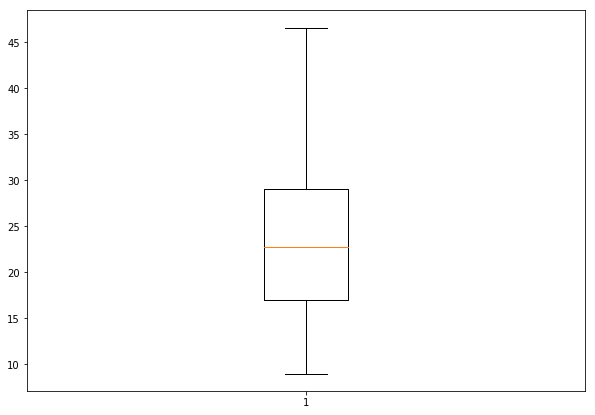

In [35]:
plt.figure(figsize=(10, 7))
plt.boxplot(auto_df['mpg'])
plt.show()

#### Histograms

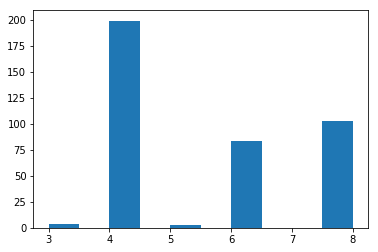

In [36]:
plt.figure()
plt.hist(auto_df['cylinders'])
plt.show()

#### Scatter Plots

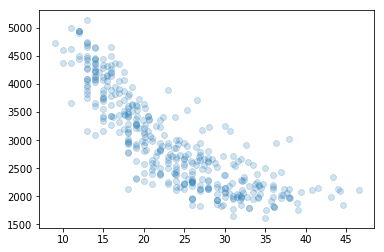

In [37]:
plt.figure()
plt.scatter(auto_df['mpg'], auto_df['weight'], alpha=0.2)
plt.show()

#### scatter matrix

In [38]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

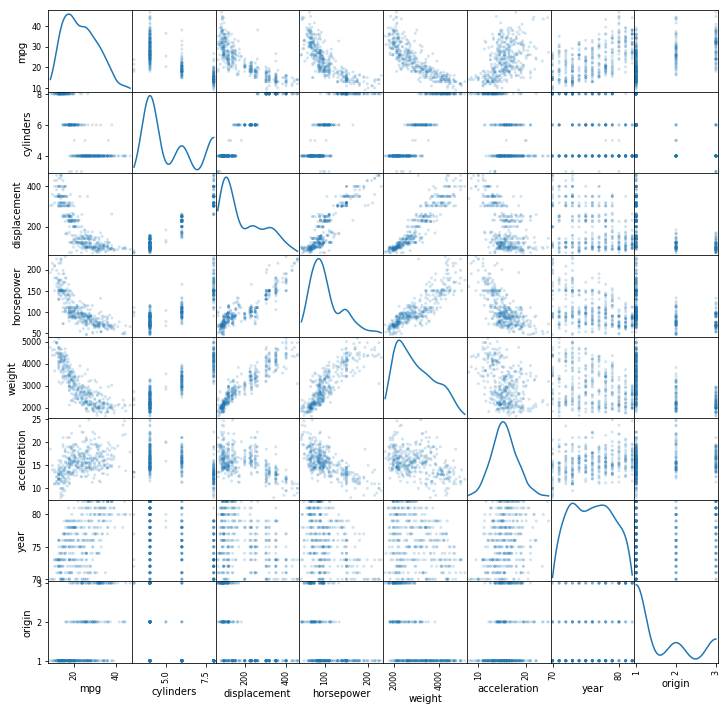

In [39]:
plt.figure()
scatter_matrix(auto_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

## 4. Crash course in numpy

In [40]:
import numpy as np
from collections import Counter

In [41]:
python_list = [1, 1, 2, 2, 4, 5, 6, 5, 1]
numpy_list = np.array([2,3,1,0])

In [42]:
def get_mean(lst):
     return np.mean(lst)

In [43]:
print(get_mean(python_list))
print(get_mean(numpy_list))
a = Counter(python_list).most_common()
print(a)

3.0
1.5
[(1, 3), (2, 2), (5, 2), (4, 1), (6, 1)]


In [44]:
def get_mode(lst):
    # most_common: https://docs.python.org/2/library/collections.html#collections.Counter.most_common
    a = Counter(python_list).most_common()
    max_occ = max([j for _, j in a])
    mode = [i for i,j in a if j == max_occ]
    return mode
# can also be done using a dictionary

In [45]:
a = Counter(python_list).most_common()
max_occ = max([j for _, j in a])
max_occ_list = []
for m, j in a:
    max_occ_list.append(j)
print(max(max_occ_list))
print(get_mode(python_list))

3
[1]


In [46]:
def custom_mean(lst):
    # Function to compute mean of list
    return np.mean(lst)

custom_mean(python_list)
custom_mean(numpy_list)

1.5

In [47]:
A = np.random.rand(5,5)
B = np.ones((5,5))
print(np.linalg.norm(A,'fro')) # max singular value
print(B)

2.554138005476066
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [48]:
print(np.matmul(A,B))# conventional matrix multiplication
print(np.multiply(A,B))# elelemnt-wise
print(A*B)# elelemnt-wise
print(A@B)# conventional matrix multiplication
print(A)

[[3.39285915 3.39285915 3.39285915 3.39285915 3.39285915]
 [1.89198254 1.89198254 1.89198254 1.89198254 1.89198254]
 [2.35523137 2.35523137 2.35523137 2.35523137 2.35523137]
 [2.21493589 2.21493589 2.21493589 2.21493589 2.21493589]
 [0.7736087  0.7736087  0.7736087  0.7736087  0.7736087 ]]
[[0.88002185 0.50453239 0.29503917 0.81095842 0.90230732]
 [0.23108353 0.70979989 0.81110768 0.09716239 0.04282905]
 [0.20111553 0.19085598 0.63655126 0.71502704 0.61168156]
 [0.47170235 0.12605027 0.63194474 0.47294502 0.51229351]
 [0.19144536 0.39395385 0.0194513  0.00835971 0.16039849]]
[[0.88002185 0.50453239 0.29503917 0.81095842 0.90230732]
 [0.23108353 0.70979989 0.81110768 0.09716239 0.04282905]
 [0.20111553 0.19085598 0.63655126 0.71502704 0.61168156]
 [0.47170235 0.12605027 0.63194474 0.47294502 0.51229351]
 [0.19144536 0.39395385 0.0194513  0.00835971 0.16039849]]
[[3.39285915 3.39285915 3.39285915 3.39285915 3.39285915]
 [1.89198254 1.89198254 1.89198254 1.89198254 1.89198254]
 [2.3552313

In [49]:
'''
Computation of matirx powers of A to the power of 20
'''
np.set_printoptions(precision=3)


def matrix_power_f(A, power = 10):
    """
    Function to raise matrix to the power
    inputs-- matrix, power (optional)
    """
    
    n, m = np.shape(A)
    A_pow = np.eye(n)
    for i in range(power):
        A_pow = np.matmul(A, A_pow)
        
    return A_pow



power = 20
print(matrix_power_f(A, power))
print(np.linalg.matrix_power(A, power))

[[810186.683 782684.416 998860.511 896129.356 947427.42 ]
 [475948.981 459792.611 586786.543 526436.515 556571.868]
 [509980.178 492668.599 628742.822 564077.661 596367.744]
 [528901.293 510947.425 652070.229 585005.882 618493.982]
 [184334.087 178076.757 227261.252 203887.808 215559.169]]
[[810186.683 782684.416 998860.511 896129.356 947427.42 ]
 [475948.981 459792.611 586786.543 526436.515 556571.868]
 [509980.178 492668.599 628742.822 564077.661 596367.744]
 [528901.293 510947.425 652070.229 585005.882 618493.982]
 [184334.087 178076.757 227261.252 203887.808 215559.169]]


In [50]:
def matrix_power_w(A, power = 10):
    """
    Function to raise matrix to the power
    inputs-- matrix, power (optional)
    """
    
    n, m = np.shape(A)
    cnt = 1
    A_pow = np.eye(n)
    while(cnt <= power):
        A_pow = np.matmul(A, A_pow)
        cnt += 1
        
    return A_pow

print(matrix_power_w(A, power))
print(np.linalg.matrix_power(A, power))


[[810186.683 782684.416 998860.511 896129.356 947427.42 ]
 [475948.981 459792.611 586786.543 526436.515 556571.868]
 [509980.178 492668.599 628742.822 564077.661 596367.744]
 [528901.293 510947.425 652070.229 585005.882 618493.982]
 [184334.087 178076.757 227261.252 203887.808 215559.169]]
[[810186.683 782684.416 998860.511 896129.356 947427.42 ]
 [475948.981 459792.611 586786.543 526436.515 556571.868]
 [509980.178 492668.599 628742.822 564077.661 596367.744]
 [528901.293 510947.425 652070.229 585005.882 618493.982]
 [184334.087 178076.757 227261.252 203887.808 215559.169]]
